
Key Analysis Metrics:
Days until breaking point: 28
Final straw (last day's load): 49.98
Total accumulated load: 480.35
Average daily load: 17.16
Breaking point stress level: 480.35
Final load contribution to breaking point: 10.40%


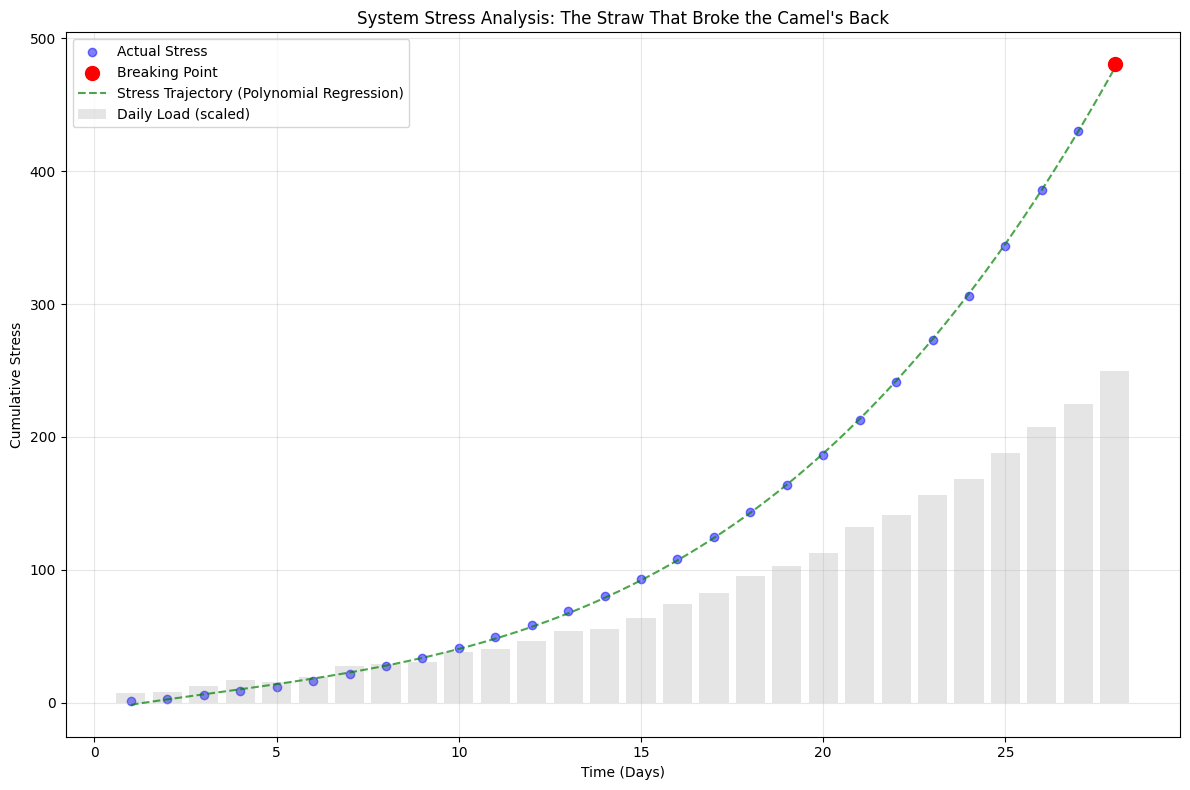

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

# Generate data
def generate_stress_data(n_points=50):
    # Base load starts small and gradually increases
    base_loads = np.linspace(1, 15, n_points)  # Increased max load
    
    # Add random variations to simulate daily fluctuations
    random_variations = np.random.normal(0, 0.5, n_points)
    
    # Create exponential growth in stress as system nears breaking point
    stress_multiplier = np.exp(base_loads/5)  # Adjusted exponential growth
    
    # Calculate cumulative stress
    daily_stress = base_loads * stress_multiplier + random_variations
    cumulative_stress = np.cumsum(daily_stress)
    
    # Define breaking point - lowered to ensure we reach it
    breaking_point = 500
    
    # Verify we reach breaking point
    if not any(cumulative_stress > breaking_point):
        raise ValueError("Breaking point never reached. Adjust parameters.")
    
    # Find where system breaks
    break_index = np.where(cumulative_stress > breaking_point)[0][0]
    
    # Create DataFrame
    df = pd.DataFrame({
        'day': range(1, break_index + 1),
        'daily_load': daily_stress[:break_index],
        'cumulative_stress': cumulative_stress[:break_index]
    })
    
    # Add status column
    df['status'] = 'Stable'
    df.loc[df.index == (break_index - 1), 'status'] = 'Breaking Point'
    
    return df

# Generate and analyze data
df = generate_stress_data()

# Fit polynomial regression to understand stress progression
X = df['day'].values.reshape(-1, 1)
y = df['cumulative_stress'].values

# Create polynomial features
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions
X_pred = np.linspace(1, df['day'].max(), 100).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Create visualization
plt.figure(figsize=(12, 8))

# Plot actual stress
plt.scatter(df['day'], df['cumulative_stress'], c='blue', alpha=0.5, label='Actual Stress')

# Highlight breaking point
breaking_point = df[df['status'] == 'Breaking Point']
plt.scatter(breaking_point.index + 1, breaking_point['cumulative_stress'], 
           c='red', s=100, label='Breaking Point', zorder=5)

# Plot regression line
plt.plot(X_pred, y_pred, 'g--', label='Stress Trajectory (Polynomial Regression)', alpha=0.7)

# Add daily load bars
plt.bar(df['day'], df['daily_load'] * 5, alpha=0.2, color='gray', label='Daily Load (scaled)')

plt.title("System Stress Analysis: The Straw That Broke the Camel's Back")
plt.xlabel('Time (Days)')
plt.ylabel('Cumulative Stress')
plt.legend()
plt.grid(True, alpha=0.3)

# Calculate and print key metrics
last_day_load = df.iloc[-1]['daily_load']
total_load = df['daily_load'].sum()
average_load = df['daily_load'].mean()
breaking_point_value = df[df['status'] == 'Breaking Point']['cumulative_stress'].values[0]

print("\nKey Analysis Metrics:")
print(f"Days until breaking point: {len(df)}")
print(f"Final straw (last day's load): {last_day_load:.2f}")
print(f"Total accumulated load: {total_load:.2f}")
print(f"Average daily load: {average_load:.2f}")
print(f"Breaking point stress level: {breaking_point_value:.2f}")

# Calculate the contribution of the final load
final_contribution_percentage = (last_day_load / breaking_point_value) * 100
print(f"Final load contribution to breaking point: {final_contribution_percentage:.2f}%")

plt.tight_layout()
plt.show()

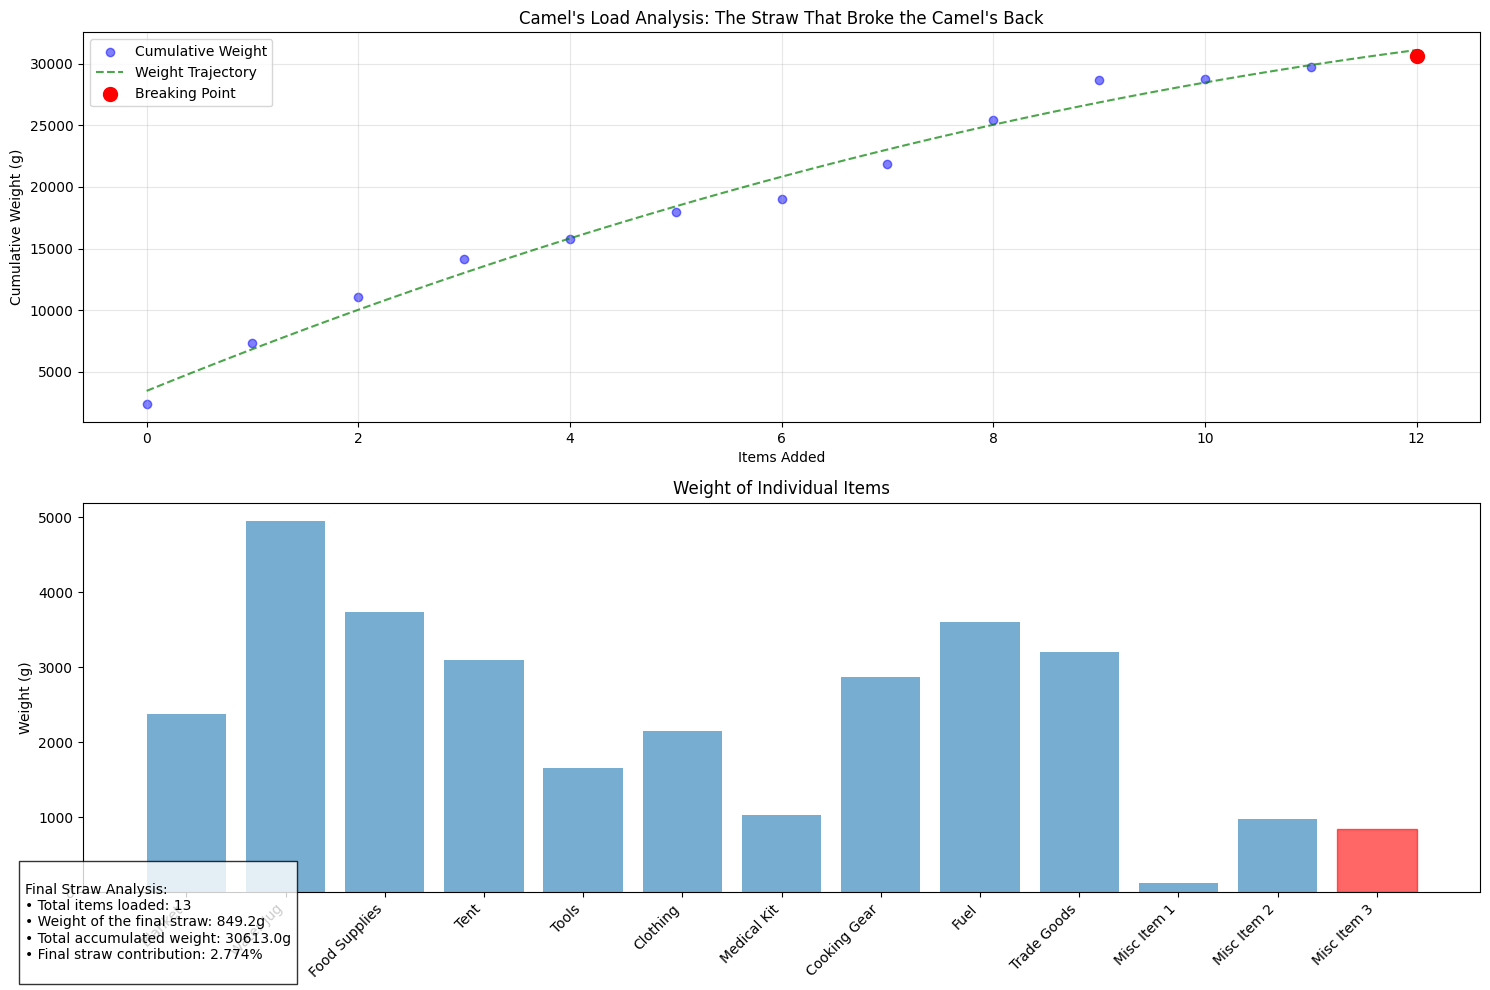


Detailed Load Analysis:
Number of items loaded: 13
Heaviest item: Water Jug (4950.7g)
Lightest item: Misc Item 1 (118.5g)

Breaking Point Details:
Total weight at break: 30613.0g
Weight of the straw: 849.2g
Contribution of final straw: 2.774%

Complete Loading Sequence:
             item       weight  cumulative_weight
0         Blanket  2374.540119        2374.540119
1       Water Jug  4950.714306        7325.254425
2   Food Supplies  3731.993942       11057.248367
3            Tent  3098.658484       14155.906851
4           Tools  1656.018640       15811.925492
5        Clothing  2155.994520       17967.920012
6     Medical Kit  1029.041806       18996.961818
7    Cooking Gear  2866.176146       21863.137964
8            Fuel  3601.115012       25464.252976
9     Trade Goods  3208.072578       28672.325553
10    Misc Item 1   118.526045       28790.851598
11    Misc Item 2   972.918867       29763.770465
12    Misc Item 3   849.198377       30612.968842


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

def generate_load_data():
    # Define common items and their weights in grams
    items = {
        'Blanket': np.random.uniform(2000, 3000),
        'Water Jug': np.random.uniform(4000, 5000),
        'Food Supplies': np.random.uniform(3000, 4000),
        'Tent': np.random.uniform(2500, 3500),
        'Tools': np.random.uniform(1500, 2500),
        'Clothing': np.random.uniform(2000, 3000),
        'Medical Kit': np.random.uniform(1000, 1500),
        'Cooking Gear': np.random.uniform(2000, 3000),
        'Fuel': np.random.uniform(3000, 4000),
        'Trade Goods': np.random.uniform(2500, 3500),
    }
    
    # Add smaller miscellaneous items
    num_misc_items = 15
    misc_items = {f'Misc Item {i}': np.random.uniform(100, 1000) 
                 for i in range(1, num_misc_items + 1)}
    
    # Combine all items
    all_items = {**items, **misc_items}
    
    # Add the final straw - literally a piece of straw
    all_items['Straw'] = 2.5  # A piece of straw weighs about 2.5 grams
    
    # Create sequence of loading
    items_df = pd.DataFrame({
        'item': list(all_items.keys()),
        'weight': list(all_items.values())
    })
    
    # Calculate cumulative weight
    items_df['cumulative_weight'] = items_df['weight'].cumsum()
    
    # Define breaking point (let's say the camel can carry 30kg = 30000g)
    breaking_point = 30000
    
    # Find where system breaks
    items_df['status'] = 'Stable'
    break_index = np.where(items_df['cumulative_weight'] > breaking_point)[0][0]
    items_df.loc[break_index, 'status'] = 'Breaking Point'
    
    # Keep only data up to breaking point
    items_df = items_df.iloc[:(break_index + 1)]
    
    return items_df

# Generate and analyze data
df = generate_load_data()

# Prepare data for regression
X = np.arange(len(df)).reshape(-1, 1)
y = df['cumulative_weight'].values

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions
X_pred = np.linspace(0, len(df)-1, 100).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot cumulative weight
plt.subplot(2, 1, 1)
plt.scatter(range(len(df)), df['cumulative_weight'], c='blue', alpha=0.5, label='Cumulative Weight')
plt.plot(X_pred, y_pred, 'g--', label='Weight Trajectory', alpha=0.7)

# Highlight breaking point
breaking_point = df[df['status'] == 'Breaking Point']
plt.scatter(breaking_point.index, breaking_point['cumulative_weight'], 
           c='red', s=100, label='Breaking Point', zorder=5)

plt.title("Camel's Load Analysis: The Straw That Broke the Camel's Back")
plt.xlabel('Items Added')
plt.ylabel('Cumulative Weight (g)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot individual item weights
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(df)), df['weight'], alpha=0.6)
plt.xticks(range(len(df)), df['item'], rotation=45, ha='right')
plt.title('Weight of Individual Items')
plt.ylabel('Weight (g)')

# Highlight the final straw
bars[-1].set_color('red')

# Add some analysis text
plt.figtext(0.02, 0.02, f"""
Final Straw Analysis:
• Total items loaded: {len(df)}
• Weight of the final straw: {df.iloc[-1]['weight']:.1f}g
• Total accumulated weight: {df.iloc[-1]['cumulative_weight']:.1f}g
• Final straw contribution: {(df.iloc[-1]['weight'] / df.iloc[-1]['cumulative_weight'] * 100):.3f}%
""", fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Load Analysis:")
print(f"Number of items loaded: {len(df)}")
print(f"Heaviest item: {df['item'][df['weight'].idxmax()]} ({df['weight'].max():.1f}g)")
print(f"Lightest item: {df['item'][df['weight'].idxmin()]} ({df['weight'].min():.1f}g)")
print(f"\nBreaking Point Details:")
print(f"Total weight at break: {df.iloc[-1]['cumulative_weight']:.1f}g")
print(f"Weight of the straw: {df.iloc[-1]['weight']:.1f}g")
print(f"Contribution of final straw: {(df.iloc[-1]['weight'] / df.iloc[-1]['cumulative_weight'] * 100):.3f}%")

# Display full item list with weights
print("\nComplete Loading Sequence:")
print(df[['item', 'weight', 'cumulative_weight']].to_string())

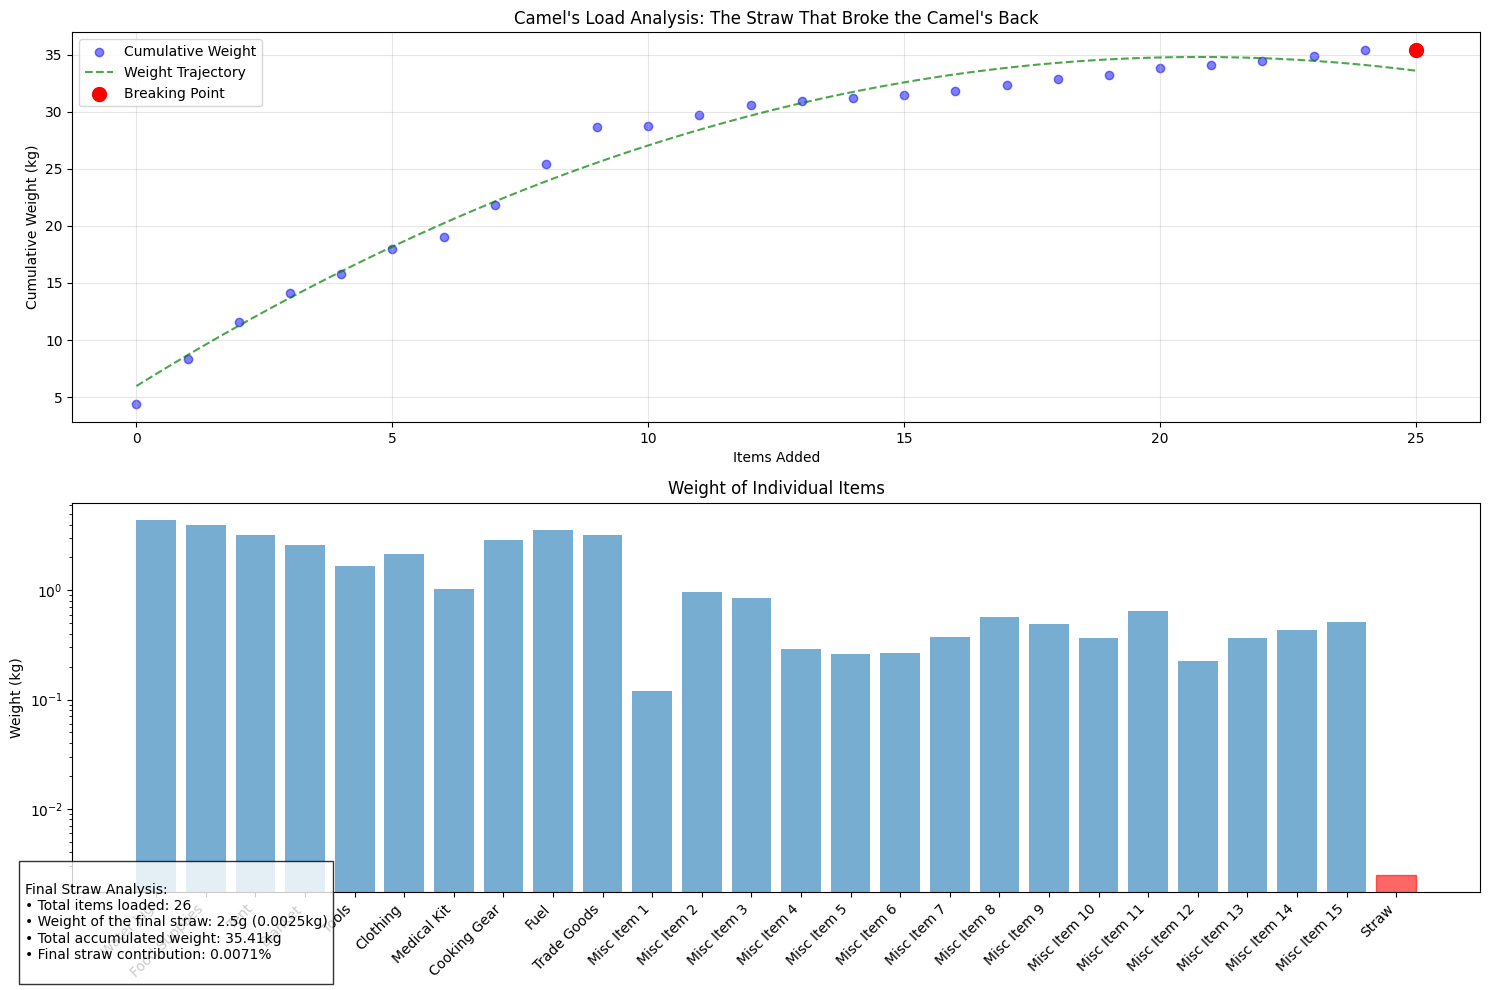


Detailed Load Analysis:
Number of items loaded: 26
Heaviest item: Water Jug (4.37kg)
Lightest item: Straw (2.5g)

Breaking Point Details:
Total weight at break: 35.41kg
Weight of the straw: 2.5g (0.0025kg)
Contribution of final straw: 0.0071%

Complete Loading Sequence:
             item  weight cumulative_weight          status
0       Water Jug  4.3745            4.3745          Stable
1   Food Supplies  3.9507            8.3253          Stable
2            Tent  3.2320           11.5572          Stable
3         Blanket  2.5987           14.1559          Stable
4           Tools  1.6560           15.8119          Stable
5        Clothing  2.1560           17.9679          Stable
6     Medical Kit  1.0290           18.9970          Stable
7    Cooking Gear  2.8662           21.8631          Stable
8            Fuel  3.6011           25.4643          Stable
9     Trade Goods  3.2081           28.6723          Stable
10    Misc Item 1  0.1185           28.7909          Stable
11    Mi

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
np.random.seed(42)

def generate_load_data():
    # Define common items and their weights in kg
    items = {
        'Water Jug': np.random.uniform(4, 5),
        'Food Supplies': np.random.uniform(3, 4),
        'Tent': np.random.uniform(2.5, 3.5),
        'Blanket': np.random.uniform(2, 3),
        'Tools': np.random.uniform(1.5, 2.5),
        'Clothing': np.random.uniform(2, 3),
        'Medical Kit': np.random.uniform(1, 1.5),
        'Cooking Gear': np.random.uniform(2, 3),
        'Fuel': np.random.uniform(3, 4),
        'Trade Goods': np.random.uniform(2.5, 3.5),
    }
    
    # Add smaller miscellaneous items
    num_misc_items = 15
    misc_items = {f'Misc Item {i}': np.random.uniform(0.1, 1) 
                 for i in range(1, num_misc_items + 1)}
    
    # Combine all items
    all_items = {**items, **misc_items}
    
    # Create initial dataframe
    items_df = pd.DataFrame({
        'item': list(all_items.keys()),
        'weight': list(all_items.values())
    })
    
    # Calculate cumulative weight
    items_df['cumulative_weight'] = items_df['weight'].cumsum()
    
    # Define breaking point (30kg capacity)
    breaking_point = 30
    
    # Find the weight needed for the straw to be the breaking point
    current_total = items_df['weight'].sum()
    remaining_capacity = breaking_point - current_total
    
    # Add the straw as the final item
    straw_weight = 0.0025  # 2.5 grams = 0.0025 kg
    
    # Add the straw
    items_df = pd.concat([
        items_df,
        pd.DataFrame({
            'item': ['Straw'],
            'weight': [straw_weight],
            'cumulative_weight': [items_df['cumulative_weight'].iloc[-1] + straw_weight]
        })
    ]).reset_index(drop=True)
    
    # Add status column
    items_df['status'] = 'Stable'
    items_df.iloc[-1, items_df.columns.get_loc('status')] = 'Breaking Point'
    
    return items_df

# Generate and analyze data
df = generate_load_data()

# Prepare data for regression
X = np.arange(len(df)).reshape(-1, 1)
y = df['cumulative_weight'].values

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_poly, y)

# Generate predictions
X_pred = np.linspace(0, len(df)-1, 100).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot cumulative weight
plt.subplot(2, 1, 1)
plt.scatter(range(len(df)), df['cumulative_weight'], c='blue', alpha=0.5, label='Cumulative Weight')
plt.plot(X_pred, y_pred, 'g--', label='Weight Trajectory', alpha=0.7)

# Highlight breaking point
breaking_point = df[df['status'] == 'Breaking Point']
plt.scatter(breaking_point.index, breaking_point['cumulative_weight'], 
           c='red', s=100, label='Breaking Point', zorder=5)

plt.title("Camel's Load Analysis: The Straw That Broke the Camel's Back")
plt.xlabel('Items Added')
plt.ylabel('Cumulative Weight (kg)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot individual item weights
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(df)), df['weight'], alpha=0.6)
plt.xticks(range(len(df)), df['item'], rotation=45, ha='right')
plt.title('Weight of Individual Items')
plt.ylabel('Weight (kg)')

# Use log scale for better visualization of the straw's weight
plt.yscale('log')

# Highlight the final straw
bars[-1].set_color('red')

# Add some analysis text
plt.figtext(0.02, 0.02, f"""
Final Straw Analysis:
• Total items loaded: {len(df)}
• Weight of the final straw: {df.iloc[-1]['weight']*1000:.1f}g ({df.iloc[-1]['weight']:.4f}kg)
• Total accumulated weight: {df.iloc[-1]['cumulative_weight']:.2f}kg
• Final straw contribution: {(df.iloc[-1]['weight'] / df.iloc[-1]['cumulative_weight'] * 100):.4f}%
""", fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Load Analysis:")
print(f"Number of items loaded: {len(df)}")
print(f"Heaviest item: {df['item'][df['weight'].idxmax()]} ({df['weight'].max():.2f}kg)")
print(f"Lightest item: {df['item'][df['weight'].idxmin()]} ({df['weight'].min()*1000:.1f}g)")
print(f"\nBreaking Point Details:")
print(f"Total weight at break: {df.iloc[-1]['cumulative_weight']:.2f}kg")
print(f"Weight of the straw: {df.iloc[-1]['weight']*1000:.1f}g ({df.iloc[-1]['weight']:.4f}kg)")
print(f"Contribution of final straw: {(df.iloc[-1]['weight'] / df.iloc[-1]['cumulative_weight'] * 100):.4f}%")

# Display full item list with weights
print("\nComplete Loading Sequence:")
formatted_df = df.copy()
formatted_df['weight'] = formatted_df['weight'].apply(lambda x: f"{x:.4f}")
formatted_df['cumulative_weight'] = formatted_df['cumulative_weight'].apply(lambda x: f"{x:.4f}")
print(formatted_df[['item', 'weight', 'cumulative_weight', 'status']].to_string())

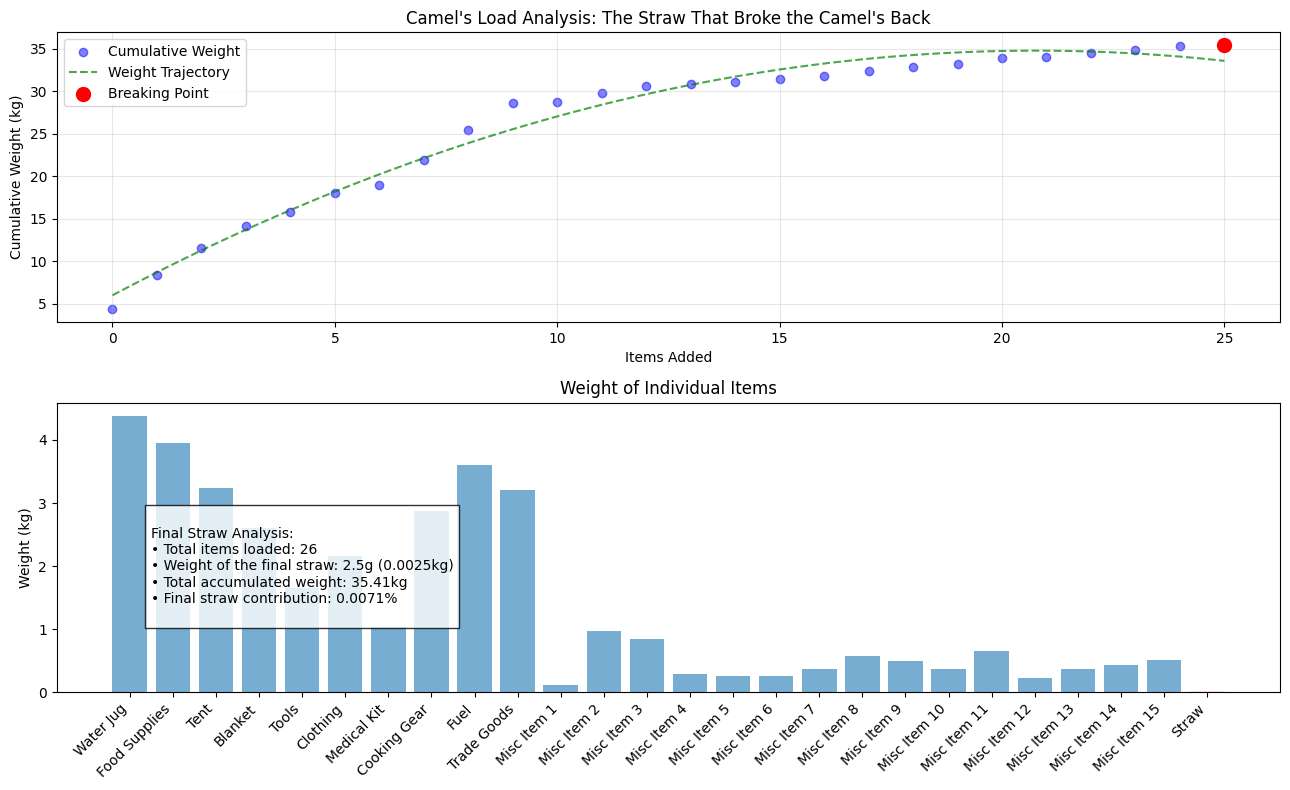


Detailed Load Analysis:
Number of items loaded: 26
Heaviest item: Water Jug (4.37kg)
Lightest item: Straw (2.5g)

Breaking Point Details:
Total weight at break: 35.41kg
Weight of the straw: 2.5g (0.0025kg)
Contribution of final straw: 0.0071%

Complete Loading Sequence:
             item  weight cumulative_weight          status
0       Water Jug  4.3745            4.3745          Stable
1   Food Supplies  3.9507            8.3253          Stable
2            Tent  3.2320           11.5572          Stable
3         Blanket  2.5987           14.1559          Stable
4           Tools  1.6560           15.8119          Stable
5        Clothing  2.1560           17.9679          Stable
6     Medical Kit  1.0290           18.9970          Stable
7    Cooking Gear  2.8662           21.8631          Stable
8            Fuel  3.6011           25.4643          Stable
9     Trade Goods  3.2081           28.6723          Stable
10    Misc Item 1  0.1185           28.7909          Stable
11    Mi

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)



def generate_items():
    """Generate a dictionary of items with their weights."""
    common_items = {
        'Water Jug': np.random.uniform(4, 5),
        'Food Supplies': np.random.uniform(3, 4),
        'Tent': np.random.uniform(2.5, 3.5),
        'Blanket': np.random.uniform(2, 3),
        'Tools': np.random.uniform(1.5, 2.5),
        'Clothing': np.random.uniform(2, 3),
        'Medical Kit': np.random.uniform(1, 1.5),
        'Cooking Gear': np.random.uniform(2, 3),
        'Fuel': np.random.uniform(3, 4),
        'Trade Goods': np.random.uniform(2.5, 3.5),
    }

    misc_items = {f'Misc Item {i}': np.random.uniform(0.1, 1) for i in range(1, 16)}
    return {**common_items, **misc_items}


def create_load_data(items):
    """Create a DataFrame with item weights and cumulative weights."""
    # Create initial dataframe
    items_df = pd.DataFrame({
        'item': list(items.keys()),
        'weight': list(items.values())
    })
    
    # Calculate cumulative weight
    items_df['cumulative_weight'] = items_df['weight'].cumsum()
    
    # Define breaking point (30kg capacity)
    breaking_point = 30
    
    # Find the weight needed for the straw to be the breaking point
    current_total = items_df['weight'].sum()
    remaining_capacity = breaking_point - current_total
    
    # Add the straw as the final item
    straw_weight = 0.0025  # 2.5 grams = 0.0025 kg
    
    # Add the straw
    items_df = pd.concat([
        items_df,
        pd.DataFrame({
            'item': ['Straw'],
            'weight': [straw_weight],
            'cumulative_weight': [items_df['cumulative_weight'].iloc[-1] + straw_weight]
        })
    ]).reset_index(drop=True)
    
    # Add status column
    items_df['status'] = 'Stable'
    items_df.iloc[-1, items_df.columns.get_loc('status')] = 'Breaking Point'

    return items_df



def regression(df):
    # Prepare data for regression
    X = np.arange(len(df)).reshape(-1, 1)
    y = df['cumulative_weight'].values

    # Create polynomial features
    poly_features = PolynomialFeatures(degree=2)
    X_poly = poly_features.fit_transform(X)

    # Fit polynomial regression
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate predictions
    X_pred = np.linspace(0, len(df)-1, 100).reshape(-1, 1)
    X_pred_poly = poly_features.transform(X_pred)
    y_pred = model.predict(X_pred_poly)
    
    return X_pred, y_pred

_items = generate_items()
df = create_load_data(_items)
X_pred, y_pred  = regression(df)


# Create visualization
plt.figure(figsize=(13, 8))

# Plot cumulative weight
plt.subplot(2, 1, 1)
plt.scatter(range(len(df)), df['cumulative_weight'], c='blue', alpha=0.5, label='Cumulative Weight')
plt.plot(X_pred, y_pred, 'g--', label='Weight Trajectory', alpha=0.7)

# Highlight breaking point
breaking_point = df[df['status'] == 'Breaking Point']
plt.scatter(breaking_point.index, breaking_point['cumulative_weight'], 
           c='red', s=100, label='Breaking Point', zorder=5)

plt.title("Camel's Load Analysis: The Straw That Broke the Camel's Back")
plt.xlabel('Items Added')
plt.ylabel('Cumulative Weight (kg)')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot individual item weights
plt.subplot(2, 1, 2)
bars = plt.bar(range(len(df)), df['weight'], alpha=0.6)
plt.xticks(range(len(df)), df['item'], rotation=45, ha='right')
plt.title('Weight of Individual Items')
plt.ylabel('Weight (kg)')

# Use log scale for better visualization of the straw's weight
# plt.yscale('log')

# Highlight the final straw
bars[-1].set_color('red')

# Add some analysis text
plt.figtext(0.12, 0.22, f"""
Final Straw Analysis:
• Total items loaded: {len(df)}
• Weight of the final straw: {df.iloc[-1]['weight']*1000:.1f}g ({df.iloc[-1]['weight']:.4f}kg)
• Total accumulated weight: {df.iloc[-1]['cumulative_weight']:.2f}kg
• Final straw contribution: {(df.iloc[-1]['weight'] / df.iloc[-1]['cumulative_weight'] * 100):.4f}%
""", fontsize=10, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Load Analysis:")
print(f"Number of items loaded: {len(df)}")
print(f"Heaviest item: {df['item'][df['weight'].idxmax()]} ({df['weight'].max():.2f}kg)")
print(f"Lightest item: {df['item'][df['weight'].idxmin()]} ({df['weight'].min()*1000:.1f}g)")
print(f"\nBreaking Point Details:")
print(f"Total weight at break: {df.iloc[-1]['cumulative_weight']:.2f}kg")
print(f"Weight of the straw: {df.iloc[-1]['weight']*1000:.1f}g ({df.iloc[-1]['weight']:.4f}kg)")
print(f"Contribution of final straw: {(df.iloc[-1]['weight'] / df.iloc[-1]['cumulative_weight'] * 100):.4f}%")

# Display full item list with weights
print("\nComplete Loading Sequence:")
formatted_df = df.copy()
formatted_df['weight'] = formatted_df['weight'].apply(lambda x: f"{x:.4f}")
formatted_df['cumulative_weight'] = formatted_df['cumulative_weight'].apply(lambda x: f"{x:.4f}")
print(formatted_df[['item', 'weight', 'cumulative_weight', 'status']].to_string())